**Based on Zaccone: Python Parallel Programming Cookbook** 

### Thread synchronization with Lock and RLock

When two or more operations belonging to concurrent threads try to change the shared 
memory without a proper synchronization mechanism a race condition can occur and it can produce invalid 
code execution and bugs and unexpected behavior. 

The easiest way to get around the race conditions is the use of a lock. The operation of a lock is simple; when a thread wants to 
access a portion of shared memory, it must necessarily acquire a lock on that portion prior 
to using it. In addition to this, after completing its operation, the thread must release the lock.

This approach can often lead the execution to a 
bad situation of deadlock. A deadlock occurs due to the acquisition of a lock from different 
threads; it is impossible to proceed with the execution of operations since the various locks 
between them block access to the resources.

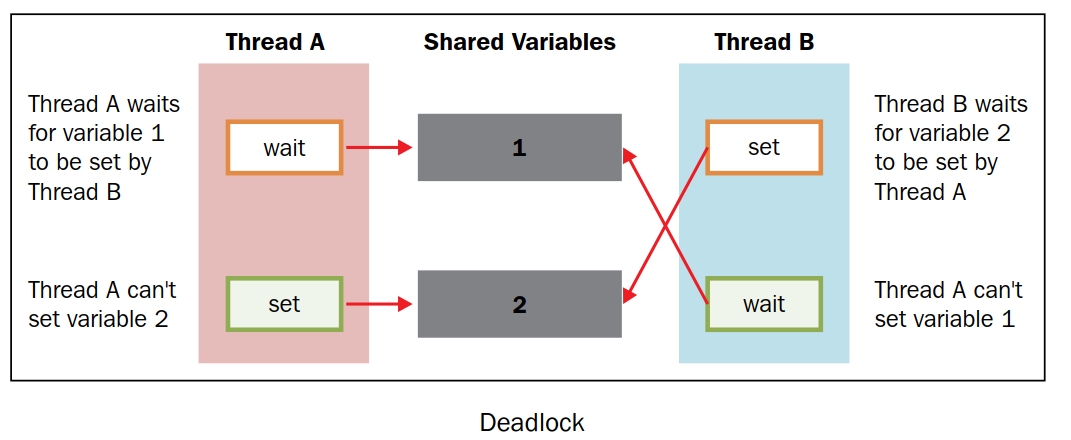

### Lock managemenet

In [1]:
# you might want to restart the kernel to run this cell
import threading

shared_resource_with_lock  = 0
shared_resource_with_no_lock = 0
COUNT = 100000
shared_resource_lock = threading.Lock()


####LOCK MANAGEMENT##
def increment_with_lock():
    global shared_resource_with_lock
    for i in range(COUNT):
        shared_resource_lock.acquire()
        shared_resource_with_lock += 1
        shared_resource_lock.release()

def decrement_with_lock():
    global shared_resource_with_lock
    for i in range(COUNT):
        shared_resource_lock.acquire()
        shared_resource_with_lock -= 1
        shared_resource_lock.release()
        
####NO LOCK MANAGEMENT ##
def increment_without_lock():
    global shared_resource_with_no_lock
    for i in range(COUNT):
        shared_resource_with_no_lock += 1
 
def decrement_without_lock():
    global shared_resource_with_no_lock
    for i in range(COUNT):
        shared_resource_with_no_lock -= 1
 
####the Main program
if __name__ == "__main__":
    t1 = threading.Thread(target = increment_with_lock)
    t2 = threading.Thread(target = decrement_with_lock)
    t3 = threading.Thread(target = increment_without_lock)
    t4 = threading.Thread(target = decrement_without_lock)
    
    t1.start()
    t2.start()
    t3.start()
    t4.start()
    t1.join()
    t2.join()
    t3.join()
    t4.join()
    print ("the value of shared variable with lock management is %s"\
           %shared_resource_with_lock)
    print ("the value of shared variable with race condition is %s"\
           %shared_resource_with_no_lock)
    


the value of shared variable with lock management is 0
the value of shared variable with race condition is -46601


Let's recap:
* Locks have two states: locked and unlocked
* We have two methods that are used to manipulate the locks: acquire() and release()

The following are the rules:
* If the state is unlocked, a call to acquire() changes the state to locked
* If the state is locked, a call to acquire() blocks until another thread calls release()
* If the state is unlocked, a call to release() raises a RuntimeError exception
* If the state is locked, a call to release() changes the state to unlocked

### RLock

The main difference between RLock and Lock is that a Lock can only be acquired once. 

It cannot be acquired again, until it is released. (After it's been released, it can be re-acaquired by any thread).

An RLock on the other hand, can be acquired multiple times, by the same thread. 
It needs to be released the same number of times in order to be "unlocked".

Another difference is that an acquired Lock can be released by any thread, 
while an acquired RLock can only be released by the thread which acquired it.



In the below example two methods running on separate threads put and remove items from a box object till the box gets empty.

In [2]:
import threading
import time

class Box(object):
    lock = threading.RLock()
    def __init__(self,items):
        self.total_items = items
    def execute(self,n):
        Box.lock.acquire()
        self.total_items += n
        Box.lock.release()
    def add(self):
        Box.lock.acquire()
        self.execute(1)
        Box.lock.release()
    def remove(self):
        Box.lock.acquire()
        self.execute(-2)
        Box.lock.release()

## These two functions run in separate threads and call the Box's methods

def adder(box,items):
    while box.total_items > 0:
        print ("adding 1 item in the box\n")
        box.add()
        time.sleep(3)
        print ("%s items still remain in the box " % box.total_items)

def remover(box,items):
    while box.total_items > 0:
        print ("removing 2 items from the box")
        box.remove()
        time.sleep(2)
        print ("%s items still remain in the box " % box.total_items)
        

## the main program build some
## threads and make sure it works
if __name__ == "__main__":
    items = 8
    print ("putting %s items in the box " % items)
    box = Box(items)
    
    # Creating two threads. ONe for adding an item the other for removing an item
    t1 = threading.Thread(target=adder,args=(box,items))
    t2 = threading.Thread(target=remover,args=(box,items))
    t1.start()
    t2.start()
    t1.join()
    t2.join()
    print ("%s items still remain in the box " % box.total_items)



putting 8 items in the box 
adding 1 item in the box

removing 2 items from the box
7 items still remain in the box 
removing 2 items from the box
5 items still remain in the box 
adding 1 item in the box

6 items still remain in the box 
removing 2 items from the box
4 items still remain in the box 4 items still remain in the box 
removing 2 items from the box

adding 1 item in the box

3 items still remain in the box 
removing 2 items from the box
1 items still remain in the box 
adding 1 item in the box

2 items still remain in the box 
removing 2 items from the box
0 items still remain in the box 
0 items still remain in the box 
0 items still remain in the box 
